# Курсовой проект для курса "Библиотеки Python для Data Science: продолжение"

**Задача:**  

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Обзор данных:**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Целевая переменная:** 

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества:**

F1-score (sklearn.metrics.f1_score)

**План курсового проекта:**

* [I. Загрузка библиотек и функций](#1)
* [II. Чтение и исследование данных](#2)
* [III. Преобразование категориальных признаков](#3)
* [IV. Обработка выбросов вещественных признаков](#4)
* [V. Заполнение отсутствующих значений (NaN)](#5) 
* [VI. Сокращение количества значений в дискретных признаках](#6)
* [VII. Анализ данных](#7)
* [VIII. Построение и оценка базовых моделей](#8)
* [IX. Выбор лучшей модели и важность признаков](#9)
* [X. Обучение и оценка финальной модели](#10)
* [XI. Предсказание и сохранение финальных данных](#11)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### I. Загрузка библиотек и функций <a class='anchor' id='1'>

In [1]:
# Основные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Разбивает выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

from scipy.stats import mannwhitneyu

# Модели
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import catboost as catb

# Метрики качества
from sklearn.metrics import r2_score as r2, classification_report, f1_score

import warnings
warnings.simplefilter('ignore')

# Cборщик мусора
import gc 

## II. Чтение и исследование данных <a class='anchor' id='2'>

In [48]:
del df
del fdf
gc.collect()

29688

In [2]:
df = pd.read_csv('./data/train.csv')
fdf = pd.read_csv('./data/test.csv')

In [3]:
# Проверка типов данных train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
# Проверка типов данных test
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [5]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [6]:
fdf.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


**Обзор целевой переменной**

In [7]:
df['Credit Default'].value_counts()
# Выборка является несбалансированной.
# 82% - 0 класс, 28% - 1 класс. 

0    5387
1    2113
Name: Credit Default, dtype: int64

**Обзор числовых признаков**

In [8]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Обзор категориальных признаков**

In [9]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

**Выделение целевой переменной и групп признаков**

In [4]:
# Целевая переменная
TARGET_NAME = 'Credit Default'
# Все признаки без целевой переменной
FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
# Категориальные признаки
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
# Категориальные признаки преобразованные в числовые
NUM_CAT_FEATURE_NAMES = ['Num Home Ownership', 'Num Years in current job', 'Num Purpose', 'Num Term']
# Числовые признаки
NUM_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + CAT_FEATURE_NAMES).tolist()
# Дискретные числовые признаки
NUM_DISC_FEATURE_NAMES = ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies']
# Вещественные числовые признаки
NUM_REAL_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + CAT_FEATURE_NAMES + NUM_DISC_FEATURE_NAMES).tolist()

**Корреляция целевой переменной с числовыми признаками**

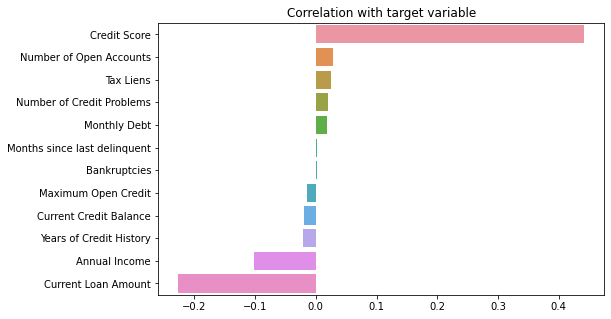

In [11]:
corr_with_target = df[NUM_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(8, 5))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Проверим распределения дискретных признаков на трейне и тесте**

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


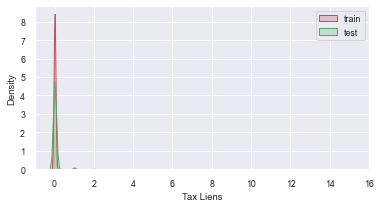

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


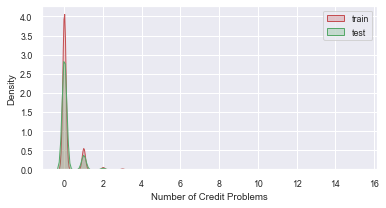

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


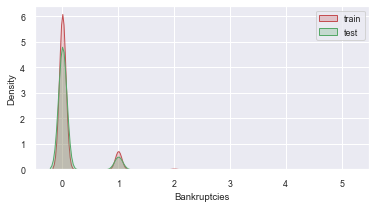

In [12]:
figsize = (6, 3)
for col in NUM_DISC_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df[col], shade=True, label='train', color='r')
    sns.kdeplot(fdf[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df[col], fdf[col]))
    plt.legend()
    plt.show()

**Проверим распределения вещественных признаков на трейне и тесте**

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


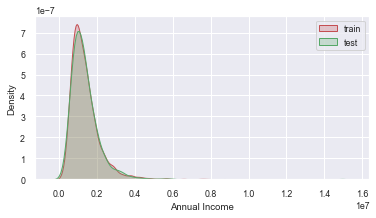

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


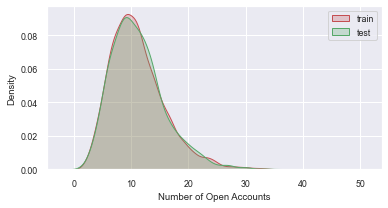

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


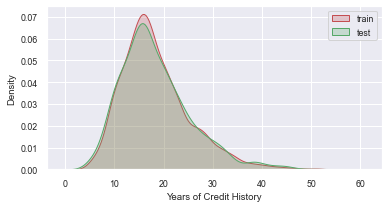

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


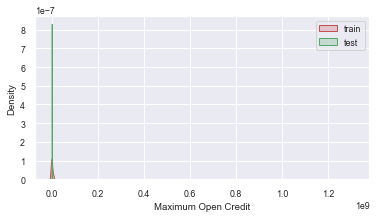

Months since last delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


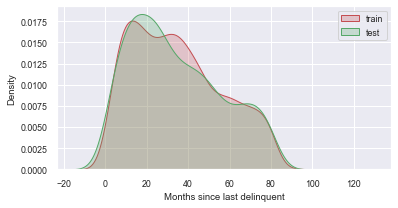

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


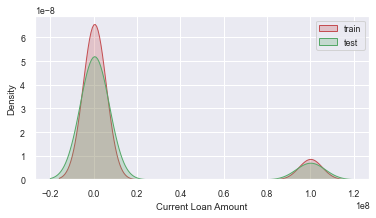

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


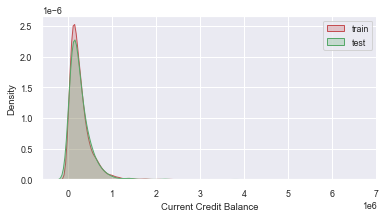

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


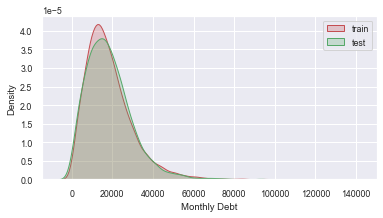

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


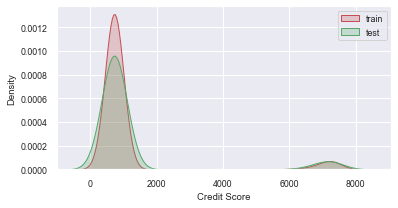

In [13]:
figsize = (6, 3)
for col in NUM_REAL_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df[col], shade=True, label='train', color='r')
    sns.kdeplot(fdf[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df[col], fdf[col]))
    plt.legend()
    plt.show()

**Проверим распределения категориальных признаков на трейне и тесте**

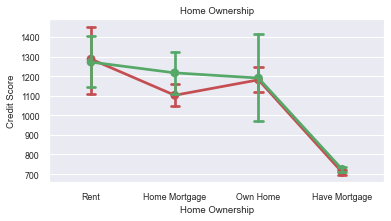

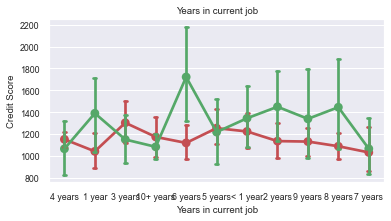

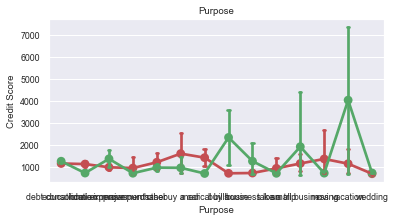

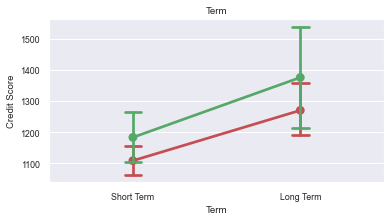

In [14]:
figsize = (6, 3)
num_feature = 'Credit Score'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=df, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=fdf, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

## III. Преобразование категориальных признаков <a class='anchor' id='3'>
* [Функция анализа категориальных признаков](#3_FA)
* [Home Ownership](#3_HO)
* [Years in current job](#3_YCJ)
* [Purpose](#3_P)
* [Term](#3_T)
* [Функция преобразования категориальных признаков](#3_CO)

### Функция анализа категориальных признаков <a class='anchor' id='3_FA'>

In [5]:
def analytics_cat(x, fx, feature, figsize=(6, 3)):
    
    print(f'\t Уникальные значения признака {feature}')
    print(f'  train \n{x[feature].sort_values().unique()}'), print(f'  test \n{fx[feature].sort_values().unique()}')
    print('-' * 50)
    print('\t Количество объектов')
    print(f'  train \n{x[feature].value_counts()}'), print(f'  test \n{fx[feature].value_counts()}')
    print('-' * 50)
    print('\t Оценка признака в разрезе целевой переменной')
    plt.figure(figsize=figsize)
    sns.countplot(x=feature, hue=TARGET_NAME, data=x)
    plt.legend(title='Target', loc='upper right')
    plt.figure(figsize=figsize)
    sns.pointplot(x=feature, y=TARGET_NAME, data=x, capsize=.1);

### Home Ownership - домовладение <a class='anchor' id='3_HO'>

- Rent - аренда  
- Have Mortgage, Home Mortgage - ипотека  
- Own Home - собственность

	 Уникальные значения признака Home Ownership
  train 
['Have Mortgage' 'Home Mortgage' 'Own Home' 'Rent']
  test 
['Have Mortgage' 'Home Mortgage' 'Own Home' 'Rent']
--------------------------------------------------
	 Количество объектов
  train 
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
  test 
Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


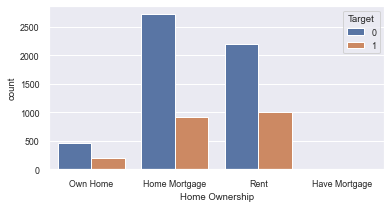

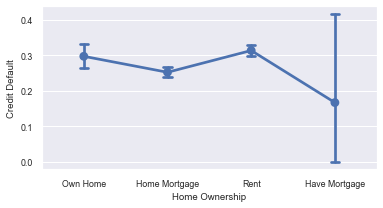

In [16]:
analytics_cat(df, fdf, 'Home Ownership')

### Years in current job - количество лет на текущем месте работы <a class='anchor' id='3_YCJ'>

	 Уникальные значения признака Years in current job
  train 
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' nan]
  test 
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' nan]
--------------------------------------------------
	 Количество объектов
  train 
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
  test 
10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
Name: Years in current job, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


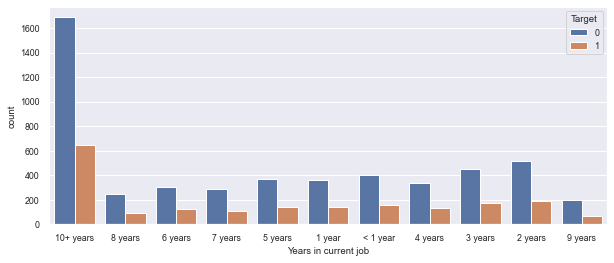

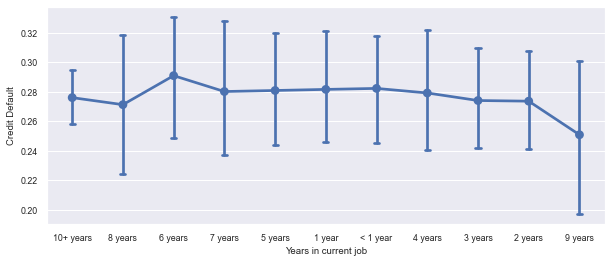

In [17]:
analytics_cat(df, fdf, 'Years in current job', (10,4))

### Purpose - цель кредита <a class='anchor' id='3_P'>

- buy a car - покупка машины
- buy house - покупка дома
- debt consolidation - консолидация кредитов
- educational expenses - расходы на образование
- home improvements - благоустройство дома
- major purchase - крупная покупка
- medical bills - медицинские расходны
- moving - переезд
- other - прочие
- renewable energy - возобновляемые источники энергии
- small business - малый бизнес
- take a trip - путешествие
- vacation - отпуск 
- wedding - свадьба  

	 Уникальные значения признака Purpose
  train 
['business loan' 'buy a car' 'buy house' 'debt consolidation'
 'educational expenses' 'home improvements' 'major purchase'
 'medical bills' 'moving' 'other' 'renewable energy' 'small business'
 'take a trip' 'vacation' 'wedding']
  test 
['business loan' 'buy a car' 'buy house' 'debt consolidation'
 'educational expenses' 'home improvements' 'major purchase'
 'medical bills' 'moving' 'other' 'small business' 'take a trip'
 'vacation' 'wedding']
--------------------------------------------------
	 Количество объектов
  train 
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energ

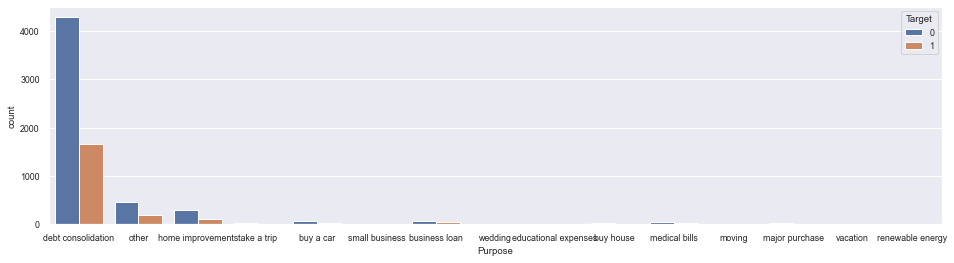

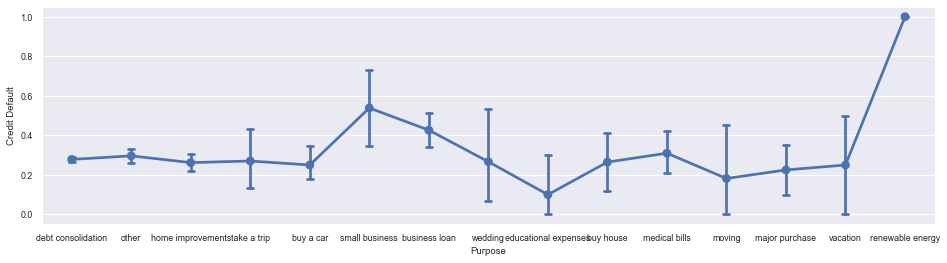

In [18]:
analytics_cat(df, fdf, 'Purpose', (16,4))

### Term - срок кредита <a class='anchor' id='3_T'>

	 Уникальные значения признака Term
  train 
['Long Term' 'Short Term']
  test 
['Long Term' 'Short Term']
--------------------------------------------------
	 Количество объектов
  train 
Short Term    5556
Long Term     1944
Name: Term, dtype: int64
  test 
Short Term    1861
Long Term      639
Name: Term, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


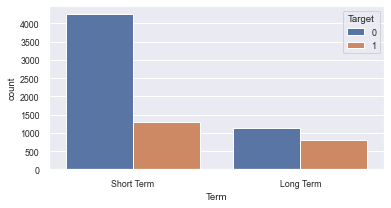

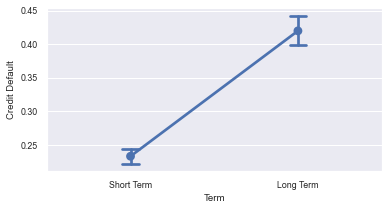

In [19]:
analytics_cat(df, fdf, 'Term')

### Функция преобразования категориальных признаков <a class='anchor' id='3_CO'>

In [6]:
def correction_cat(x):
    
    x['Num Home Ownership'] = x['Home Ownership']
    x['Num Home Ownership'] = x['Num Home Ownership'].map({'Rent': 0, 'Home Mortgage': 1, 'Have Mortgage': 1, \
                                                   'Own Home': 2})
    
    x['Num Years in current job'] = x['Years in current job']
    x['Num Years in current job'] = x['Num Years in current job'].map({'< 1 year':0, '1 year':1, '2 years':2, \
                            '3 years': 3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, \
                            '8 years':8, '9 years':9, '10+ years':10})
    
    x['Num Purpose'] = x['Purpose']
    x['Num Purpose'] = x['Num Purpose'].map({'business loan':0, 'buy a car':1, 'buy house':2, 'debt consolidation': 3, \
                   'educational expenses':4, 'home improvements':5, 'major purchase':6, 'medical bills':7, \
                   'moving':8, 'other':9, 'renewable energy':9, 'small business':10, 'take a trip':11, \
                   'vacation':12, 'wedding':13})
    
    x['Num Term'] = x['Term']
    x['Num Term'] = x['Num Term'].map({'Short Term': 0, 'Long Term': 1})
    
correction_cat(df)
correction_cat(fdf)

## IV. Обработка выбросов вещественных признаков<a class='anchor' id='4'>
   
* [Функция анализа выбросов вещественных признаков](#4_FV)
* [Annual Income](#4_AI)
* [Number of Open Accounts](#4_NOA)
* [Years of Credit History](#4_YCH)
* [Maximum Open Credit](#4_MOC)
* [Months since last delinquent](#4_MD)
* [Current Loan Amount](#4_CLA)
* [Current Credit Balance](#4_CCB)
* [Monthly Debt](#4_MD)
* [Credit Score](#4_CS)
* [Функция исправления выбросов вещественных признаков](#4_CT)

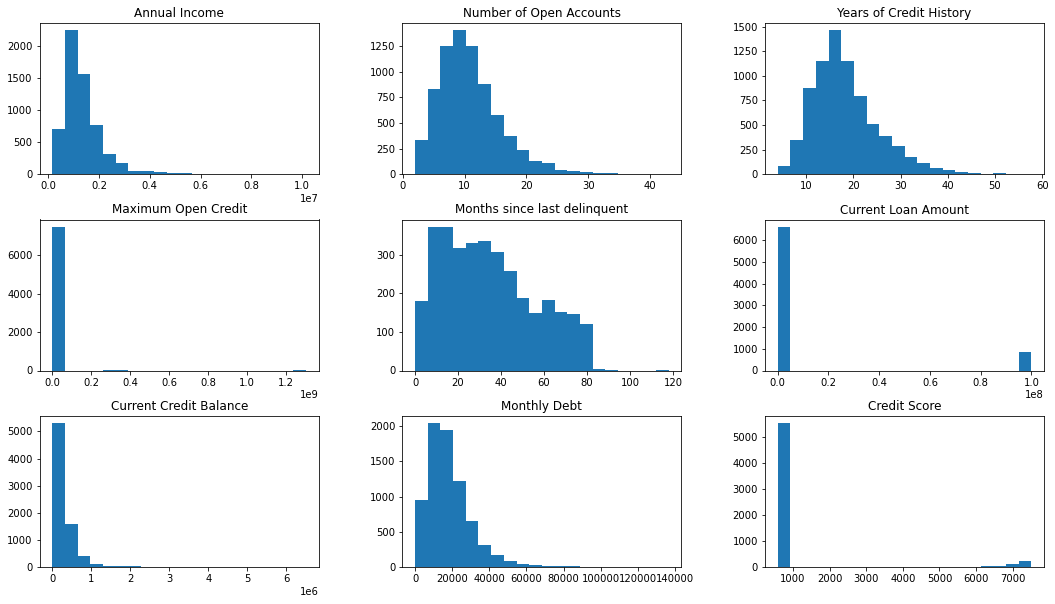

In [19]:
df[NUM_REAL_FEATURE_NAMES].hist(figsize=(18,10), bins=20, grid=False);

### Функция анализа выбросов вещественных признаков <a class='anchor' id='4_FV'>

In [21]:
def analytics_real(x, fx, feature, param, sign='>', figsize=(5, 3)):
    
    if sign == '>':
        print(f'\t Количество преположительных выбросов признака {feature}')
        print('train -', len(x[x[feature] > param]), '| test -', len(fx[fx[feature] > param]))
        print('-' * 50)
    elif sign == '=':
        print(f'\t Количество преположительных выбросов признака {feature}')
        print('train -', len(x[x[feature] == param]), '| test -', len(fx[fx[feature] == param]))
        print('-' * 50)
    print('\t Оценка признака в разрезе целевой переменной')
    plt.figure(figsize=figsize)
    sns.pointplot(x=TARGET_NAME, y=feature, data=x, capsize=.1);

### Annual Income - годовой доход <a class='anchor' id='4_AI'>

	 Количество преположительных выбросов признака Annual Income
train - 26 | test - 6
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


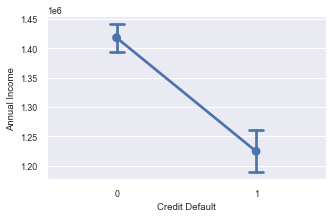

In [22]:
feature = 'Annual Income'
param = 6000000

analytics_real(df, fdf, feature, param)

### Number of Open Accounts - количество открытых счетов <a class='anchor' id='4_NOA'>

	 Количество преположительных выбросов признака Number of Open Accounts
train - 27 | test - 6
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


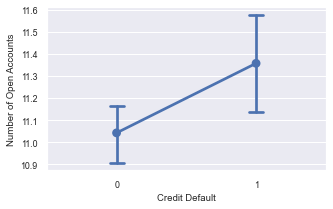

In [23]:
feature = 'Number of Open Accounts'
param = 30

analytics_real(df, fdf, feature, param)

### Years of Credit History - количество лет кредитной истории <a class='anchor' id='4_YCH'> 

	 Количество преположительных выбросов признака Years of Credit History
train - 8 | test - 2
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


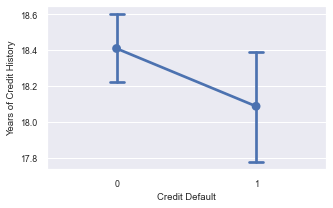

In [24]:
feature = 'Years of Credit History'
param = 50

analytics_real(df, fdf, feature, param)

### Maximum Open Credit - наибольший открытый кредит <a class='anchor' id='4_MOC'>

	 Количество преположительных выбросов признака Maximum Open Credit
train - 64 | test - 26
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


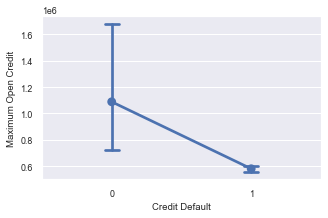

In [25]:
feature = 'Maximum Open Credit'
param = 4000000

analytics_real(df, fdf, feature, param)

	 Количество преположительных выбросов признака Maximum Open Credit
train - 65 | test - 14
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


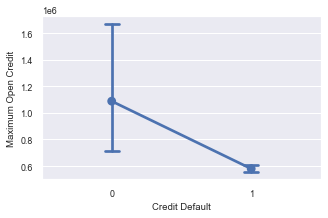

In [26]:
feature = 'Maximum Open Credit'
param = 0

analytics_real(df, fdf, feature, param, sign='=')

### Months since last delinquent - количество месяцев с последней просрочки платежа <a class='anchor' id='4_MD'>

	 Количество преположительных выбросов признака Months since last delinquent
train - 31 | test - 8
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


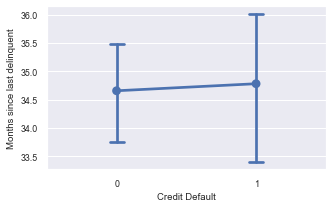

In [27]:
feature = 'Months since last delinquent'
param = 80

analytics_real(df, fdf, feature, param)

### Current Loan Amount - текущая сумма кредита <a class='anchor' id='4_CLA'>

	 Количество преположительных выбросов признака Current Loan Amount
train - 870 | test - 297
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


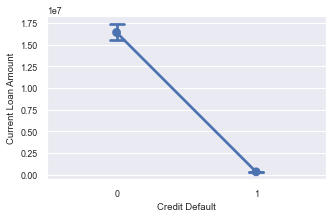

In [28]:
feature = 'Current Loan Amount'
param = 10000000

analytics_real(df, fdf, feature, param)

### Current Credit Balance - текущий кредитный баланс <a class='anchor' id='4_CCB'>

	 Количество преположительных выбросов признака Current Credit Balance
train - 53 | test - 11
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


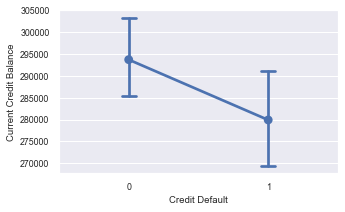

In [29]:
feature = 'Current Credit Balance'
param = 0.0

analytics_real(df, fdf, feature, param, sign='=')

### Monthly Debt - ежемесячный долг <a class='anchor' id='4_MD'>

	 Количество преположительных выбросов признака Monthly Debt
train - 17 | test - 3
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


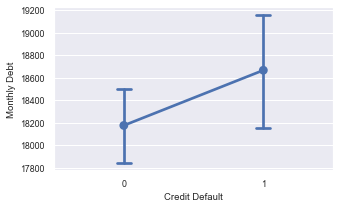

In [30]:
feature = 'Monthly Debt'
param = 80000

analytics_real(df, fdf, feature, param)

### Credit Score - кредитный рейтинг <a class='anchor' id='4_CS'>

	 Количество преположительных выбросов признака Credit Score
train - 400 | test - 160
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


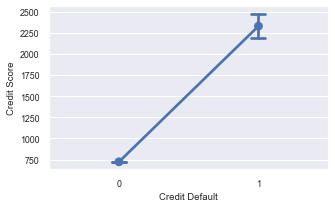

In [31]:
feature = 'Credit Score'
param = 1000

analytics_real(df, fdf, feature, param)

### Функция исправления выбросов вещественных признаков <a class='anchor' id='4_CT'>

In [7]:
def correction_real(x):
    x.loc[x['Annual Income'] > 6000000, 'Annual Income'] = x['Annual Income']/10
    
    x.loc[x['Number of Open Accounts'] > 30, 'Number of Open Accounts'] = x['Number of Open Accounts'].mean()
    
    x.loc[x['Years of Credit History'] > 40, 'Years of Credit History'] = x['Years of Credit History'].mean()
    
    x.loc[x['Maximum Open Credit'] > 5000000, 'Maximum Open Credit'] = x['Maximum Open Credit']/10
    x.loc[x['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = x['Maximum Open Credit'].mean()
    
    x.loc[x['Months since last delinquent'] > 80, 'Months since last delinquent'] = x['Months since last delinquent'].mean()
    
    x['Current Loan Amount'] = round(x['Current Loan Amount'], 2)
    
    x.loc[x['Current Credit Balance'] == 0.0, 'Current Credit Balance'] = df['Current Credit Balance'].mean()
    
correction_real(df)
correction_real(fdf)

## V. Заполнение отсутствующих значений (NaN) <a class='anchor' id='5'>
   
* [Модель RandomForestRegressor для заполнения nan](#5_M)
* [Функция анализа отсутствующих значений](#5_FN)
* [Bankruptcies](#5_B)
* [Years in current job](#5_YCJ)
* [Num Years in current job](#5_NYCJ)
* [Annual Income](#5_AI)
* [Credit Score](#5_CS)
* [Months since last delinquent](#5_MS)

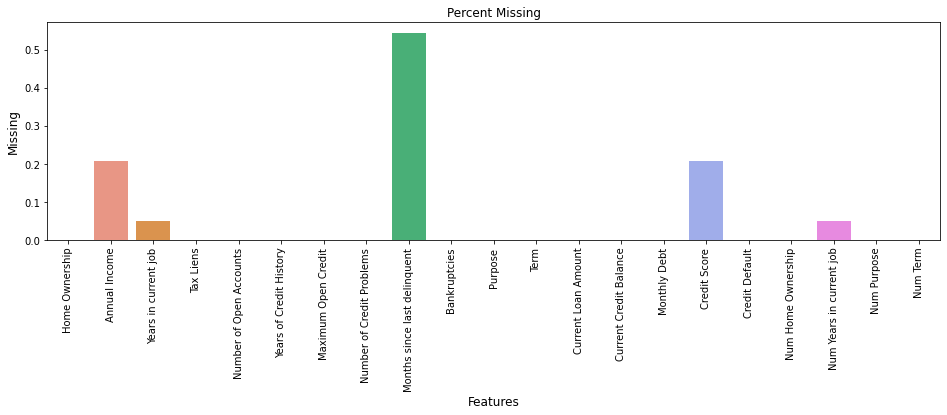

In [27]:
nan_df = (df.isna().sum() / df.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Модель RandomForestRegressor для заполнения nan <a class='anchor' id='5_M'>

In [9]:
def model_nan(X, col, param): 

    X['Id'] = X.index
    # Модель RandomForestRegressor для заполнения пустых значений
    # параметры для создания 2 датасетов: на df_fool модель будет обучаться 
    param_df_fool = param + [col] + ['Id']
    param_df_null = param + ['Id']
    
    # датасет с не заполненным значением col
    df_null = X.loc[(X[col].isnull()) | (X[col] == 0.0)][param_df_null]
    # датасет с заполненным значением col, на котором будет происходить обучение
    df_fool = X.loc[(X[col].notnull()) & (X[col] != 0.0)][param_df_fool]
    
    # датафрейм без целевой переменной
    X_t = df_fool[param_df_null]
    # датафрейм с целевой переменной
    y_t = df_fool[col]
       
    # модель RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_depth=20, random_state=42)

    # обучение модели на полном df_fool
    rf.fit(X_t, y_t)

    # расчет метрики качества
    y_t_pred = rf.predict(X_t)
    R2 = f'R2: {round(r2(y_t, y_t_pred), 3)}'
    
    # предсказание признака col на обученной модели для df_null
    df_null_pred = list(rf.predict(df_null))

    # новый столбец 
    df_null[col] = df_null_pred
    # заполнение начального датасета df полученным значением col из датасета df_null
    for i in X['Id']:
        list_df = list(X.loc[(X['Id'] == i)][col])
        if str(list_df[0]) == 'nan' or list_df[0] == 0.0:
            list_df_null = list(round(df_null.loc[(df_null['Id'] == i)][col], 1))
            X.loc[X['Id'] == i, col] = list_df_null[0]   
            
    X.set_index('Id', inplace=True)
    
    return X, R2

### Функция анализа отсутствующих значений <a class='anchor' id='5_FN'>

In [10]:
def analytics_nan(x, fx, feature, plot='countplot', figsize=(6,3)):
    
    print(f'\t Количество пропущенных значений признака {feature}')
    print(f'  train \n{x[feature].isna().sum()}'), print(f'  test \n{fx[feature].isna().sum()}')
    print('-' * 50)
    print(f'\t Уникальные значения')
    print(f'  train \n{x[feature].sort_values().unique()}'), print(f'  test \n{fx[feature].sort_values().unique()}')
    print('-' * 50)
    if plot == 'countplot':
        print('\t Количество объектов')
        print(f'  train \n{x[feature].value_counts()}'), print(f'  test \n{fx[feature].value_counts()}')
        print('-' * 50)
        print('\t Оценка признака в разрезе целевой переменной')
        plt.figure(figsize=figsize)
        sns.countplot(x=feature, hue=TARGET_NAME, data=x)
        plt.legend(title='Target', loc='upper right')
    elif plot == 'hist':
        print('\t Подготовка к заполнению nan моделью RandomForestRegressor')
        plt.figure(figsize = figsize)
        plt.hist(x[feature], bins=40)

### Bankruptcies - банкротства <a class='anchor' id='5_B'>

	 Количество пропущенных значений признака Bankruptcies
  train 
14
  test 
3
--------------------------------------------------
	 Уникальные значения
  train 
[ 0.  1.  2.  3.  4. nan]
  test 
[ 0.  1.  2.  3.  4.  5. nan]
--------------------------------------------------
	 Количество объектов
  train 
0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64
  test 
0.0    2252
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


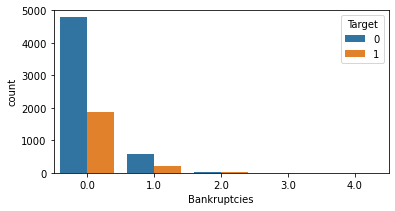

In [11]:
feature = 'Bankruptcies'
analytics_nan(df, fdf, feature)

In [12]:
df.loc[df[feature].isna(), feature] = df[feature].median()
fdf.loc[fdf[feature].isna(), feature] = df[feature].median()

### Years in current job - количество лет на текущем месте работы <a class='anchor' id='5_YCJ'>

	 Количество пропущенных значений признака Years in current job
  train 
0
  test 
0
--------------------------------------------------
	 Уникальные значения
  train 
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
  test 
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
--------------------------------------------------
	 Количество объектов
  train 
10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
  test 
10+ years    896
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
Name: Years in current job, dtype: int64
--------------------------------------

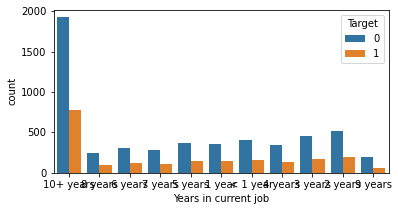

In [38]:
feature = 'Years in current job'
analytics_nan(df, fdf, feature)

In [37]:
df.loc[df[feature].isna(), feature] = '10+ years'
fdf.loc[fdf[feature].isna(), feature] = '10+ years'

### Num Years in current job - количество лет на текущем месте работы <a class='anchor' id='5_NYCJ'>

	 Количество пропущенных значений признака Num Years in current job
  train 
371
  test 
86
--------------------------------------------------
	 Уникальные значения
  train 
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
  test 
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
--------------------------------------------------
	 Подготовка к заполнению nan моделью RandomForestRegressor


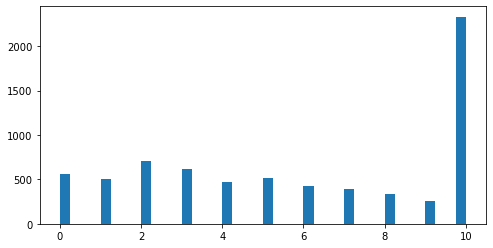

In [40]:
feature = 'Num Years in current job'
analytics_nan(df, fdf, feature, plot='hist', figsize=(8,4))

In [41]:
cor=df.corr()[feature]
param = list(cor[(np.abs(cor)>0.12) & (cor != 1) & (cor.index != TARGET_NAME)].index)
param

['Years of Credit History', 'Monthly Debt', 'Num Home Ownership']

In [42]:
model_df = model_nan(df, feature, param)
model_fdf = model_nan(fdf, feature, param)
df = model_df[0]
fdf = model_fdf[0]

model_df[1], model_fdf[1]

('R2: 0.605', 'R2: 0.653')

### Annual Income - годовой доход <a class='anchor' id='5_AI'>

	 Количество пропущенных значений признака Annual Income
  train 
1557
  test 
513
--------------------------------------------------
	 Уникальные значения
  train 
[ 164597.  175845.  177251. ... 5759280. 5798040.      nan]
  test 
[ 106533.  163305.  182609. ... 5979623. 5997920.      nan]
--------------------------------------------------
	 Подготовка к заполнению nan моделью RandomForestRegressor


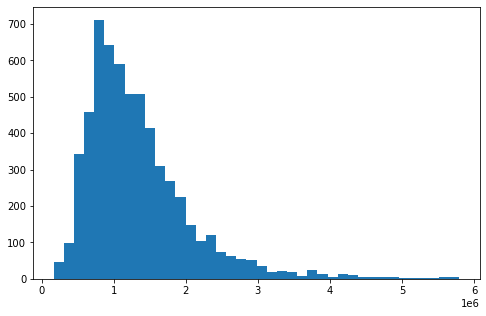

In [43]:
feature = 'Annual Income'
analytics_nan(df, fdf, feature, plot='hist', figsize=(8,5))

In [44]:
cor=df.corr()[feature]
param = list(cor[(np.abs(cor)>0.1) & (cor != 1) & (cor.index != TARGET_NAME)].index)
param

['Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Current Credit Balance',
 'Monthly Debt',
 'Num Home Ownership',
 'Num Years in current job',
 'Num Term']

In [45]:
model_df = model_nan(df, feature, param)
model_fdf = model_nan(fdf, feature, param)
df = model_df[0]
fdf = model_fdf[0]

model_df[1], model_fdf[1]

('R2: 0.775', 'R2: 0.779')

### Credit Score - кредитный рейтинг <a class='anchor' id='5_CS'>

	 Количество пропущенных значений признака Credit Score
  train 
1557
  test 
513
--------------------------------------------------
	 Уникальные значения
  train 
[ 585.  586.  588.  589.  590.  591.  593.  594.  597.  598.  599.  601.
  602.  604.  606.  607.  608.  609.  610.  611.  612.  613.  614.  615.
  616.  617.  618.  619.  620.  621.  622.  624.  625.  626.  627.  628.
  629.  630.  631.  632.  633.  634.  635.  636.  637.  638.  639.  640.
  642.  643.  644.  645.  646.  647.  648.  649.  650.  651.  652.  653.
  654.  655.  656.  657.  658.  659.  660.  661.  662.  663.  664.  665.
  666.  667.  668.  669.  670.  671.  672.  673.  674.  675.  676.  677.
  678.  679.  680.  681.  682.  683.  684.  685.  686.  687.  688.  689.
  690.  691.  692.  693.  694.  695.  696.  697.  698.  699.  700.  701.
  702.  703.  704.  705.  706.  707.  708.  709.  710.  711.  712.  713.
  714.  715.  716.  717.  718.  719.  720.  721.  722.  723.  724.  725.
  726.  727.  728.  729.  730.  7

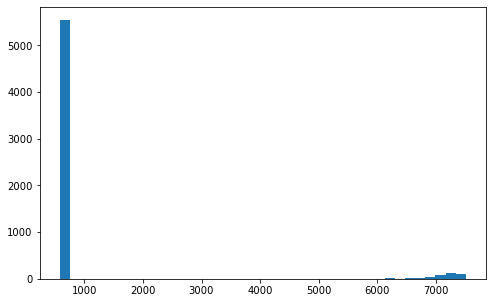

In [46]:
feature = 'Credit Score'
analytics_nan(df, fdf, feature, plot='hist', figsize=(8,5))

In [47]:
cor=df.corr()[feature]
param = list(cor[(np.abs(cor)>0.01) & (cor != 1) & (cor.index != TARGET_NAME)].index)
param

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Bankruptcies',
 'Current Loan Amount',
 'Num Purpose',
 'Num Term']

In [48]:
model_df = model_nan(df, feature, param)
model_fdf = model_nan(fdf, feature, param)
df = model_df[0]
fdf = model_fdf[0]

model_df[1], model_fdf[1]

('R2: 0.549', 'R2: 0.582')

### Months since last delinquent - количество месяцев с последней просрочки платежа <a class='anchor' id='5_MS'>

	 Количество пропущенных значений признака Months since last delinquent
  train 
4081
  test 
1358
--------------------------------------------------
	 Уникальные значения
  train 
[ 0.          1.          2.          3.          4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.         15.         16.         17.
 18.         19.         20.         21.         22.         23.
 24.         25.         26.         27.         28.         29.
 30.         31.         32.         33.         34.         34.69260018
 35.         36.         37.         38.         39.         40.
 41.         42.         43.         44.         45.         46.
 47.         48.         49.         50.         51.         52.
 53.         54.         55.         56.         57.         58.
 59.         60.         61.         62.         63.         64.
 65.         66.         67.         68.         69.         70.
 71.         72.         73.   

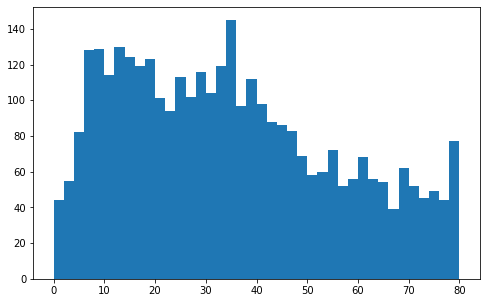

In [49]:
feature = 'Months since last delinquent'
analytics_nan(df, fdf, feature, plot='hist', figsize=(8,5))

In [50]:
cor=df.corr()[feature]
param = list(cor[(np.abs(cor)>0.02) & (cor != 1) & (cor.index != TARGET_NAME)].index)
param

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Bankruptcies',
 'Current Credit Balance',
 'Monthly Debt',
 'Num Home Ownership',
 'Num Years in current job']

In [51]:
model_df = model_nan(df, feature, param)
model_fdf = model_nan(fdf, feature, param)
df = model_df[0]
fdf = model_fdf[0]

model_df[1], model_fdf[1]

('R2: 0.709', 'R2: 0.715')

## VI. Сокращение количества значений в дискретных признаках <a class='anchor' id='6'>
    
* [Функция анализа дискретных признаков](#6_FD)
* [Tax Liens](#6_TL)
* [Number of Credit Problems](#6_NCP)
* [Bankruptcies](#6_B)
* [Функция сокращения значений в дискретных признаках](#6_CZ)

### Функция анализа дискретных признаков <a class='anchor' id='6_FD'>

In [52]:
def analytics_disc(x, fx, feature, figsize=(6,3)):
    
    print(f'\t Уникальные значения')
    print(f'  train \n{x[feature].sort_values().unique()}'), print(f'  test \n{fx[feature].sort_values().unique()}')
    print('-' * 50)
    print('\t Количество объектов')
    print(f'  train \n{x[feature].value_counts()}'), print(f'  test \n{fx[feature].value_counts()}')
    print('-' * 50)
    print('\t Оценка признака в разрезе целевой переменной')
    plt.figure(figsize=figsize)
    sns.countplot(x=feature, hue=TARGET_NAME, data=x)
    plt.legend(title='Target', loc='upper right')
    
    plt.figure(figsize=figsize)
    sns.pointplot(x=feature, y=TARGET_NAME, data=x, capsize=.1,)

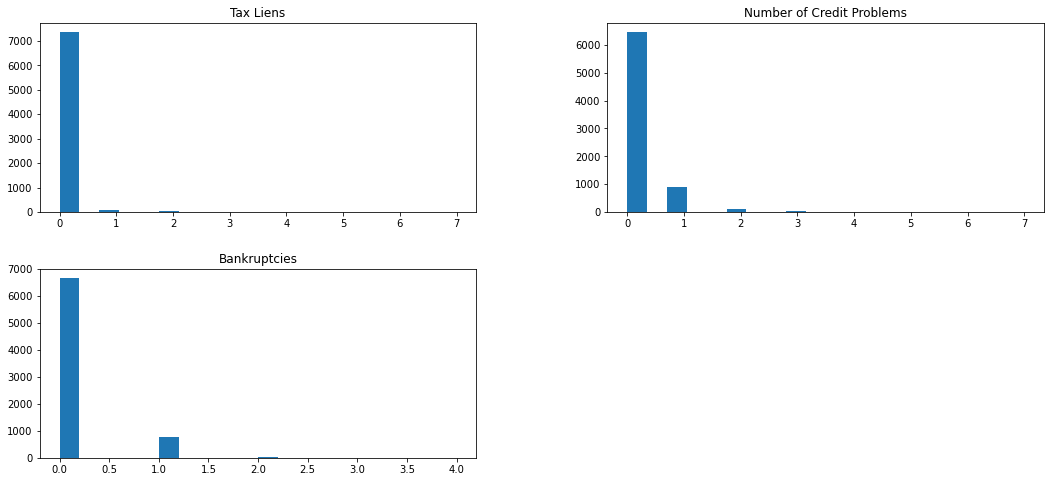

In [53]:
df[NUM_DISC_FEATURE_NAMES].hist(figsize=(18,8), bins=20, grid=False);

### Tax Liens - налоговые обременения <a class='anchor' id='6_TL'>

	 Уникальные значения
  train 
[0. 1. 2. 3. 4. 5. 6. 7.]
  test 
[ 0.  1.  2.  3.  4.  5.  6. 15.]
--------------------------------------------------
	 Количество объектов
  train 
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
  test 
0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


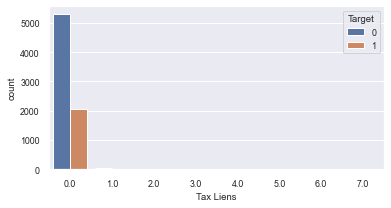

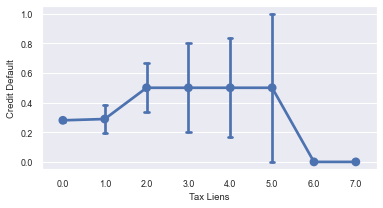

In [52]:
feature = 'Tax Liens'
analytics_disc(df, fdf, feature)

### Number of Credit Problems - количество проблем с кредитом <a class='anchor' id='6_NCP'>

	 Уникальные значения
  train 
[0. 1. 2. 3. 4. 5. 6. 7.]
  test 
[ 0.  1.  2.  3.  4.  5.  7. 15.]
--------------------------------------------------
	 Количество объектов
  train 
0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64
  test 
0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
15.0       1
4.0        1
7.0        1
Name: Number of Credit Problems, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


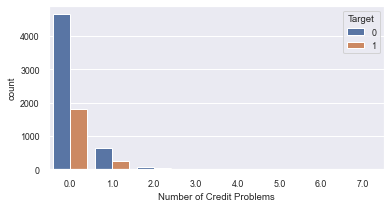

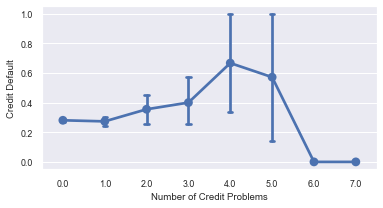

In [53]:
feature = 'Number of Credit Problems'
analytics_disc(df, fdf, feature)

### Bankruptcies - банкротства <a class='anchor' id='6_B'>

	 Уникальные значения
  train 
[0. 1. 2. 3. 4.]
  test 
[0. 1. 2. 3. 4. 5.]
--------------------------------------------------
	 Количество объектов
  train 
0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64
  test 
0.0    2255
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64
--------------------------------------------------
	 Оценка признака в разрезе целевой переменной


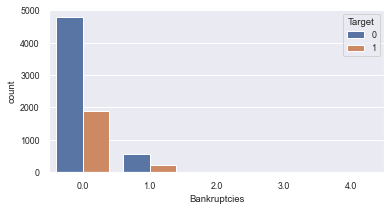

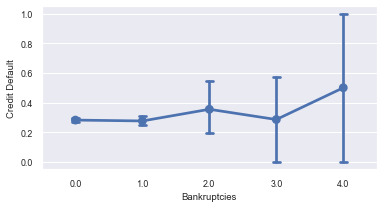

In [54]:
feature = 'Bankruptcies'
analytics_disc(df, fdf, feature)

### Функция сокращения  значений в дискретных признаках<a class='anchor' id='6_CZ'>

In [54]:
def change_feature(x):
    
    x.loc[x['Tax Liens'].isin([0, 1]),'Tax Liens'] = 0
    x.loc[x['Tax Liens'].isin([2, 3, 4, 5]), 'Tax Liens'] = 1
    x.loc[x['Tax Liens'].isin([6, 7, 15]), 'Tax Liens'] = 2
    
    x.loc[x['Number of Credit Problems'].isin([0, 1]),'Number of Credit Problems'] = 0
    x.loc[x['Number of Credit Problems'].isin([2, 3]),'Number of Credit Problems'] = 1
    x.loc[x['Number of Credit Problems'].isin([4, 5]),'Number of Credit Problems'] = 2
    x.loc[x['Number of Credit Problems'].isin([6, 7]),'Number of Credit Problems'] = 3
    
    x.loc[x['Bankruptcies'] > 1, 'Bankruptcies'] = 1

change_feature(df)
change_feature(fdf)

## VII. Анализ данных <a class='anchor' id='7'>

In [55]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Num Home Ownership,Num Years in current job,Num Purpose,Num Term
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.341863e+06,0.007200,11.048738,18.030953,6.507281e+05,0.023333,35.137716,0.110133,1.187318e+07,2.918814e+05,18314.454133,1157.860267,0.281733,0.659067,6.354627,3.717600,0.259200
std,6.912022e+05,0.089158,4.708727,6.476404,1.673636e+06,0.176238,14.949305,0.313077,3.192612e+07,3.169295e+05,11926.764673,1436.174022,0.449874,0.630305,3.144398,2.031486,0.438225
min,1.645970e+05,0.000000,2.000000,4.000000,4.334000e+03,0.000000,1.000000,0.000000,1.124200e+04,1.900000e+01,0.000000,585.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.753395e+05,0.000000,8.000000,13.500000,2.867040e+05,0.000000,28.000000,0.000000,1.801690e+05,1.158288e+05,10067.500000,718.000000,0.000000,0.000000,3.700000,3.000000,0.000000
50%,1.203897e+06,0.000000,10.000000,17.000000,4.875530e+05,0.000000,34.700000,0.000000,3.095730e+05,2.133320e+05,16076.500000,738.000000,0.000000,1.000000,6.400000,3.000000,0.000000
75%,1.618173e+06,0.000000,14.000000,21.600000,7.899760e+05,0.000000,41.600000,0.000000,5.198820e+05,3.604062e+05,23818.000000,806.625000,1.000000,1.000000,10.000000,3.000000,1.000000
max,5.798040e+06,2.000000,30.000000,40.000000,1.304726e+08,3.000000,80.000000,1.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,2.000000,10.000000,13.000000,1.000000


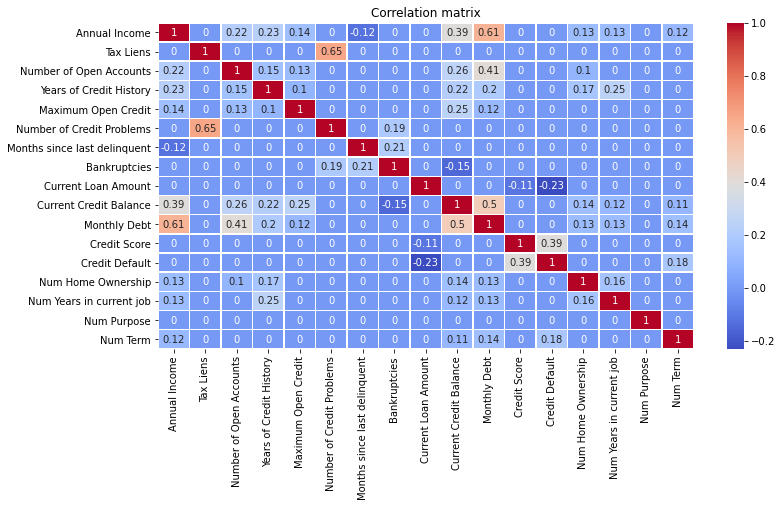

In [56]:
plt.figure(figsize = (12,6))

sns.plotting_context(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## VIII. Построение и оценка базовых моделей <a class='anchor' id='8'>
    
* [Нормализация данных](#8_N)
* [Разбиение данных на train и test](#8_R)
* [LogisticRegression](#8_lr)
* [DecisionTreeClassifier](#8_tree)
* [CatBoostClassifier](#8_catb)

In [57]:
def evaluate_preds(model, X_train, X_valid, y_train, y_valid, name):
    
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    print('TRAIN\n\n' + classification_report(y_train, y_train_pred))
    print('TEST\n\n' + classification_report(y_valid, y_valid_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_valid, y_valid_pred))
 
    report_train = classification_report(y_train, y_train_pred, output_dict=True)
    report_valid = classification_report(y_valid, y_valid_pred, output_dict=True)
        
    stata.loc[name, 'f1_macro_train'] = report_train['macro avg']['f1-score']
    stata.loc[name, 'f1_macro_valid'] = report_valid['macro avg']['f1-score']
    stata.loc[name, 'f1_0_train'] = report_train['0']['f1-score']
    stata.loc[name, 'f1_0_valid'] = report_valid['0']['f1-score']
    stata.loc[name, 'f1_1_train'] = report_train['1']['f1-score']
    stata.loc[name, 'f1_1_valid'] = report_valid['1']['f1-score']

### Нормализация данных <a class='anchor' id='8_N'>

In [66]:
stata = pd.DataFrame()
X = df[NUM_FEATURE_NAMES + NUM_CAT_FEATURE_NAMES]
X_cat = df.drop(columns=[TARGET_NAME] + NUM_CAT_FEATURE_NAMES)
y = df[TARGET_NAME]

In [71]:
scaler = StandardScaler()

X = X.copy()
X[NUM_FEATURE_NAMES + NUM_CAT_FEATURE_NAMES] = scaler.fit_transform(X[NUM_FEATURE_NAMES + NUM_CAT_FEATURE_NAMES])
X = X.copy()

X_cat = X_cat.copy()
X_cat[NUM_FEATURE_NAMES] = scaler.fit_transform(X_cat[NUM_FEATURE_NAMES])
X_cat = X_cat.copy()

### Разбиение данных на train и test <a class="anchor" id="8_R"></a>

In [76]:
# разбиваем датафреймы на тренировочные и валидационные
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.33, 
                                                      shuffle=True, 
                                                      random_state=42, 
                                                      stratify=y)

In [77]:
X_train.shape, X_valid.shape

((5025, 16), (2475, 16))

In [78]:
disbalance = round(y_train.value_counts()[0] / y_train.value_counts()[1], 2)
disbalance

2.55

### LogisticRegression <a class='anchor' id='8_lr'>

In [79]:
%%time
model_lr = LogisticRegression(C=0.01, 
                              random_state=42, 
                              class_weight={0:1, 1:disbalance},
                              max_iter=100)
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_valid, y_train, y_valid, 'model_lr')

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.75      0.78      3609
           1       0.48      0.60      0.53      1416

    accuracy                           0.70      5025
   macro avg       0.65      0.67      0.66      5025
weighted avg       0.73      0.70      0.71      5025

TEST

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1778
           1       0.49      0.60      0.54       697

    accuracy                           0.71      2475
   macro avg       0.66      0.68      0.66      2475
weighted avg       0.73      0.71      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1332  446
1                276  421
CPU times: user 44.3 ms, sys: 5 µs, total: 44.3 ms
Wall time: 59 ms


### DecisionTreeClassifier <a class='anchor' id='8_tree'>

In [80]:
%%time
model_tree = DecisionTreeClassifier(random_state=42,
                                    class_weight={0:1, 1:disbalance},
                                    max_depth=4
                                    )
model_tree.fit(X_train, y_train)

evaluate_preds(model_tree, X_train, X_valid, y_train, y_valid, 'model_tree')

TRAIN

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3609
           1       0.52      0.50      0.51      1416

    accuracy                           0.73      5025
   macro avg       0.66      0.66      0.66      5025
weighted avg       0.72      0.73      0.73      5025

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1778
           1       0.53      0.53      0.53       697

    accuracy                           0.74      2475
   macro avg       0.67      0.67      0.67      2475
weighted avg       0.74      0.74      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1457  321
1                331  366
CPU times: user 44.7 ms, sys: 9 µs, total: 44.7 ms
Wall time: 43.1 ms


### CatBoostClassifier <a class='anchor' id='8_catb'>

In [81]:
# разбиваем датафреймы на тренировочные и валидационные
X_train_cat, X_valid_cat, y_train_cat, y_valid_cat = train_test_split(X_cat, y, 
                                                      test_size=0.33, 
                                                      shuffle=True, 
                                                      random_state=42, 
                                                      stratify=y)

In [84]:
%%time
model_catb = catb.CatBoostClassifier(silent=True, random_state=42,
                                     class_weights=[1, disbalance],
                                     eval_metric='F1',
                                     early_stopping_rounds=20,
                                     cat_features=CAT_FEATURE_NAMES)

model_catb.fit(X_train_cat, y_train_cat, eval_set=(X_valid_cat, y_valid_cat))

# выводим общие метрики на трейне и тесте
evaluate_preds(model_catb, X_train_cat, X_valid_cat, y_train_cat, y_valid_cat, 'model_catb')

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3609
           1       0.49      0.62      0.55      1416

    accuracy                           0.71      5025
   macro avg       0.66      0.68      0.67      5025
weighted avg       0.74      0.71      0.72      5025

TEST

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1778
           1       0.49      0.63      0.55       697

    accuracy                           0.71      2475
   macro avg       0.66      0.69      0.67      2475
weighted avg       0.74      0.71      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1322  456
1                257  440
CPU times: user 4.58 s, sys: 250 ms, total: 4.83 s
Wall time: 528 ms


## IX. Выбор лучшей модели и важность признаков <a class='anchor' id='9'>

In [85]:
# формирование графика важности признаков
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (14, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        list_feature_importances = feature_importances['feature'][:get_top].tolist()
        
    return list_feature_importances

In [86]:
# консолидированный DataFrame метрик обученных моделей
stata

,f1_macro_train,f1_macro_valid,f1_0_train,f1_0_valid,f1_1_train,f1_1_valid
model_lr,0.658314,0.662566,0.784177,0.786769,0.532451,0.538363
model_tree,0.659547,0.673032,0.811718,0.817162,0.507377,0.528902
model_catb,0.668768,0.670012,0.789857,0.787608,0.547679,0.552417


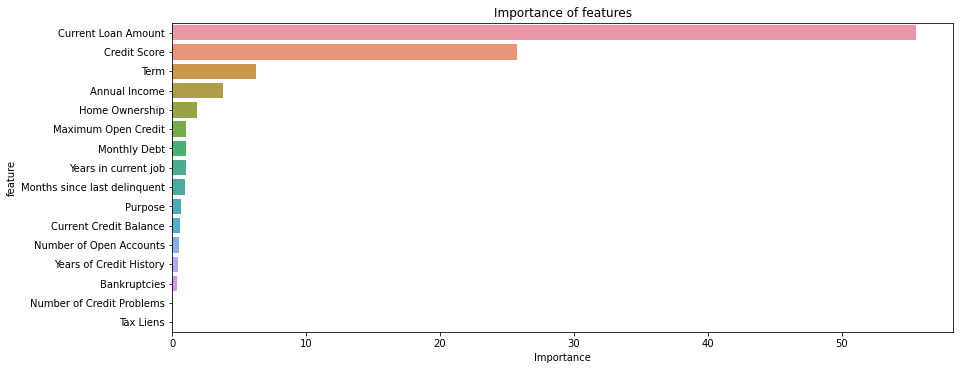

In [97]:
# Лучшие метрики показала модель CatBoostClassifier
important_features_top = show_feature_importances(X_train_cat.columns,
                                                  model_catb.feature_importances_, get_top=10)

## X. Обучение и оценка финальной модели <a class='anchor' id='10'>

In [98]:
X = df[important_features_top]
y = df[TARGET_NAME]
X_test = fdf[important_features_top]

In [99]:
X_test

,Current Loan Amount,Credit Score,Term,Annual Income,Home Ownership,Maximum Open Credit,Monthly Debt,Years in current job,Months since last delinquent,Purpose
Id,,,,,,,,,,
0,162470.0,2405.8,Short Term,821562.5,Rent,220968.0,6813.0,4 years,70.0,debt consolidation
1,78298.0,699.0,Short Term,231838.0,Rent,55946.0,2318.0,1 year,8.0,educational expenses
2,200178.0,7260.0,Short Term,1152540.0,Home Mortgage,204600.0,18729.0,3 years,34.1,debt consolidation
3,217382.0,739.0,Short Term,1220313.0,Home Mortgage,456302.0,27559.0,10+ years,70.0,debt consolidation
4,777634.0,706.0,Long Term,2340952.0,Home Mortgage,1207272.0,42605.0,6 years,34.4,debt consolidation
...,...,...,...,...,...,...,...,...,...,...
2495,99999999.0,745.0,Short Term,1020053.0,Home Mortgage,559152.0,15046.0,10+ years,68.0,debt consolidation
2496,468512.0,1306.4,Short Term,2206030.5,Home Mortgage,1737780.0,32996.0,2 years,77.0,debt consolidation
2497,430496.0,695.0,Short Term,1171806.0,Home Mortgage,1706430.0,36912.0,2 years,53.3,debt consolidation


In [100]:
# разбиваем датафреймы на тренировочные и валидационные
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.33, 
                                                      shuffle=True, 
                                                      random_state=42, 
                                                      stratify=y)

In [101]:
%%time
model_catb.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# выводим общие метрики на трейне и тесте
evaluate_preds(model_catb, X_train, X_valid, y_train, y_valid, 'model_catb')

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      3609
           1       0.51      0.65      0.57      1416

    accuracy                           0.72      5025
   macro avg       0.68      0.70      0.68      5025
weighted avg       0.75      0.72      0.73      5025

TEST

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1778
           1       0.49      0.64      0.56       697

    accuracy                           0.71      2475
   macro avg       0.67      0.69      0.67      2475
weighted avg       0.74      0.71      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1320  458
1                253  444
CPU times: user 6.52 s, sys: 281 ms, total: 6.8 s
Wall time: 535 ms


## XI. Предсказание и сохранение финальных данных <a class='anchor' id='11'>

In [102]:
%%time
y_pred = model_catb.predict(X_test)
final_df = pd.DataFrame({'Id':X_test.index, 'Credit Default':y_pred})
final_df.to_csv('Yakupova_predictions.csv', index=False, encoding='utf-8')

CPU times: user 22.4 ms, sys: 247 µs, total: 22.7 ms
Wall time: 11 ms


In [88]:
final_df

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2495,2495,1
2496,2496,1
2497,2497,1
2498,2498,1
